# 侵蚀Otsu标记
此操作使用模糊、Otsu阈值、二值侵蚀和掩模Voronoi标记来分割和标记图像。

在使用Otsu方法进行模糊和阈值处理后，应用迭代二值侵蚀。使用连通组件标记来标记侵蚀图像中的对象，然后使用掩模Voronoi标记将这些标签扩张以再次适应初始二值图像。

此函数类似于`voronoi_otsu_labeling`。它旨在更好地处理对象密集时标签相互交换的情况。与使用Voronoi-Otsu标记一样，应用此操作时小对象可能会消失。

这个函数的灵感来自Jan Brocher（Biovoxxel）在[Biovoxxel工具箱](https://zenodo.org/badge/latestdoi/434949702)中的类似[Java实现](https://github.com/biovoxxel/bv3dbox/blob/9e38ed02cff606e7e8fbe57db0f6af810bf1a83a/BioVoxxel_3D_Box/src/main/java/de/biovoxxel/bv3dbox/plugins/BV_LabelSplitter.java#L83)。非常感谢Jan！

In [1]:
from skimage.data import cells3d
import pyclesperanto_prototype as cle
import napari_segment_blobs_and_things_with_membranes as nsbatwm

In [2]:
image = cells3d()
image.shape

(60, 2, 256, 256)

我们只截取一个2D切片。

cl.OCLArray([[ 8868.,  6923.,  5690., ..., 13942., 12804., 14653.],
       [ 7113.,  5501.,  5216., ..., 16739., 13657., 15554.],
       [ 5833.,  7160.,  5928., ..., 15838., 16739., 17166.],
       ...,
       [ 2513.,  3936.,  3414., ...,  3699.,  4126.,  4220.],
       [ 3319.,  3272.,  2513., ...,  3699.,  3367.,  2940.],
       [ 3130.,  3794.,  3225., ...,  2987.,  3746.,  4315.]],
      dtype=float32)
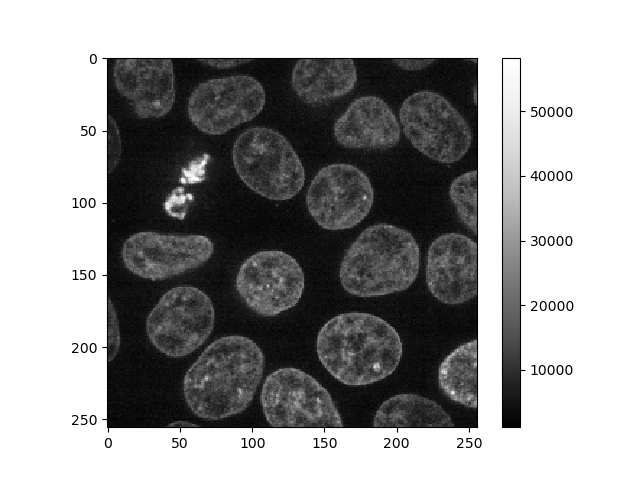
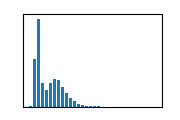

In [3]:
nuclei = cle.asarray(image[30, 1])
nuclei

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
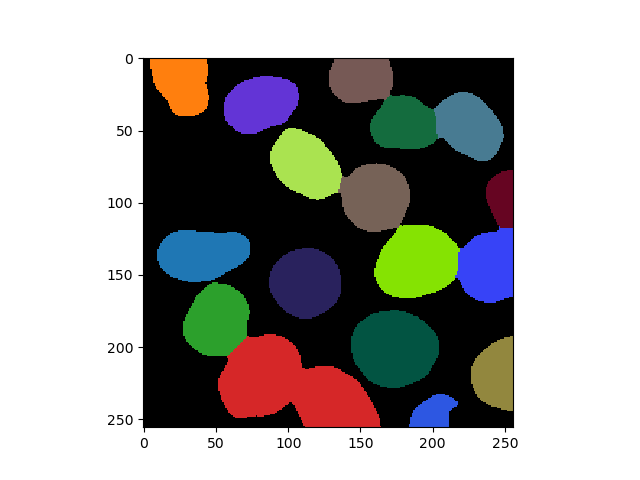

In [4]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=4)
labels

## 参数：number_of_erosions
如果指定的侵蚀次数太少，粘连的对象将被标记为一体。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
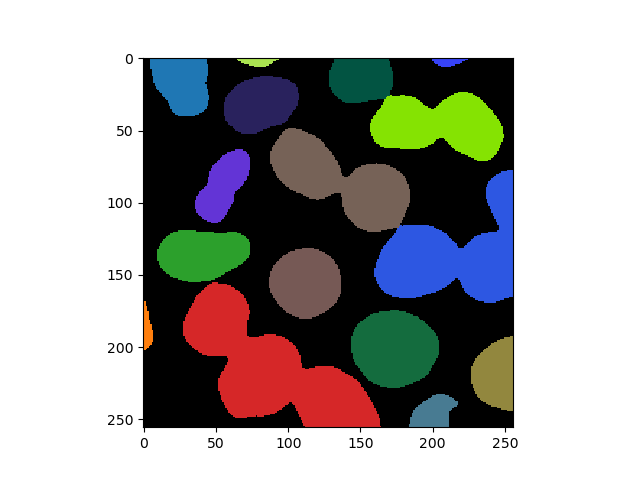

In [5]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=4)
labels

如果配置的侵蚀次数太多，对象可能会消失。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
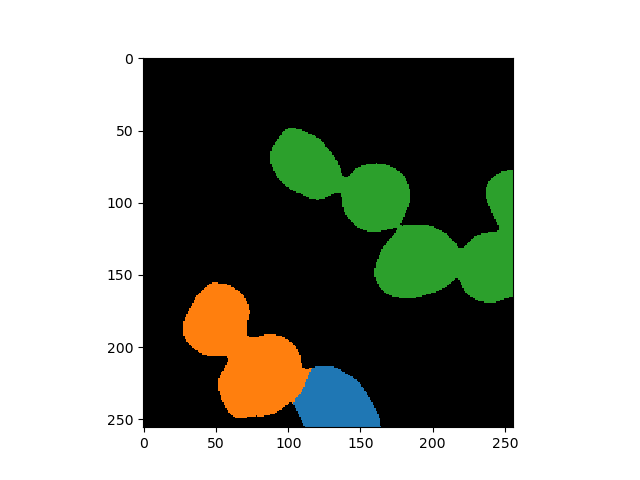

In [6]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=20, outline_sigma=4)
labels

## 参数：outline_sigma
通过这个轮廓，你可以控制阈值处理前的去噪。如果这个值太低，对象可能会有噪声边缘，孔洞会导致更多的对象分裂。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
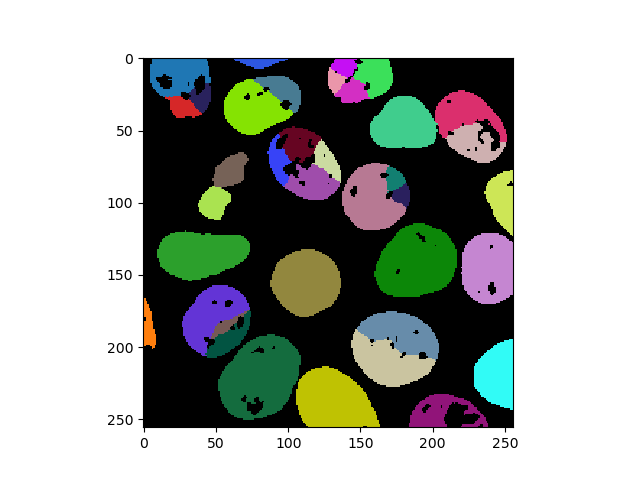

In [7]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=5, outline_sigma=1)
labels

如果这个值太高，对象轮廓可能不再适合原始对象。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
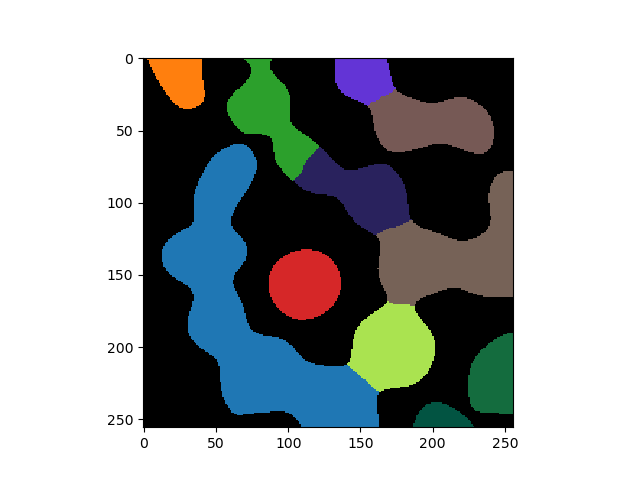

In [8]:
labels = cle.eroded_otsu_labeling(nuclei, number_of_erosions=11, outline_sigma=10)
labels